In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings(action="ignore")
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [15]:
import factor_analyzer
import missingno as msgn

In [16]:
df = pd.read_csv('cep45.csv')

In [17]:
df.head()

,corr,filtro,psu,region,p1_1,p1_2,p1_3,p2,p3,p4,...,de14_b,de14_c,de14_d,de14_e,de14_f,de15,de16,de17,b5,pond
0,1,937,150,13,9,3,6,1,3,2,...,2,2,2,2,2,6,4,4,1,0.782461
1,2,938,150,13,7,6,3,2,2,1,...,2,2,1,2,2,8,4,4,1,1.157864
2,3,939,150,13,3,6,9,2,2,3,...,2,2,2,2,2,9,6,4,1,1.204037
3,4,1096,182,13,3,4,11,3,2,2,...,2,2,2,2,2,6,3,3,1,1.025330
4,5,1097,182,13,6,11,7,3,1,1,...,2,2,2,2,2,6,3,3,1,1.204037


In [18]:
trust_df = df.filter(regex='p17_*')

In [19]:
trust_df = trust_df.rename(columns={
    'p17_a': 'I. catolica',
    'p17_b': 'I evangelica',
    'p17_c': 'FFAA',
    'p17_d': 'Justicia',
    'p17_e': 'Prensa',
    'p17_f': 'television',
    'p17_g': 'Sindicatos',
    'p17_h': 'Carabineros',
    'p17_i': 'Gobierno',
    'p17_j': 'Partidos Politicos',
    'p17_k': 'Congreso',
    'p17_i': 'Empresas',
    'p17_m': 'Universidades',
    'p17_n': 'Radio'
})

In [20]:
def fetch_missing(df, missing_vals=[8,9]):
    for colname, serie in df.iteritems():
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2))

In [21]:
fetch_missing(trust_df)

I. catolica 0.03
I evangelica 0.07
FFAA 0.04
Justicia 0.04
Prensa 0.03
television 0.02
Sindicatos 0.09
Carabineros 0.02
Empresas 0.03
Partidos Politicos 0.03
Congreso 0.05
p17_l 0.04
Universidades 0.07
Radio 0.03


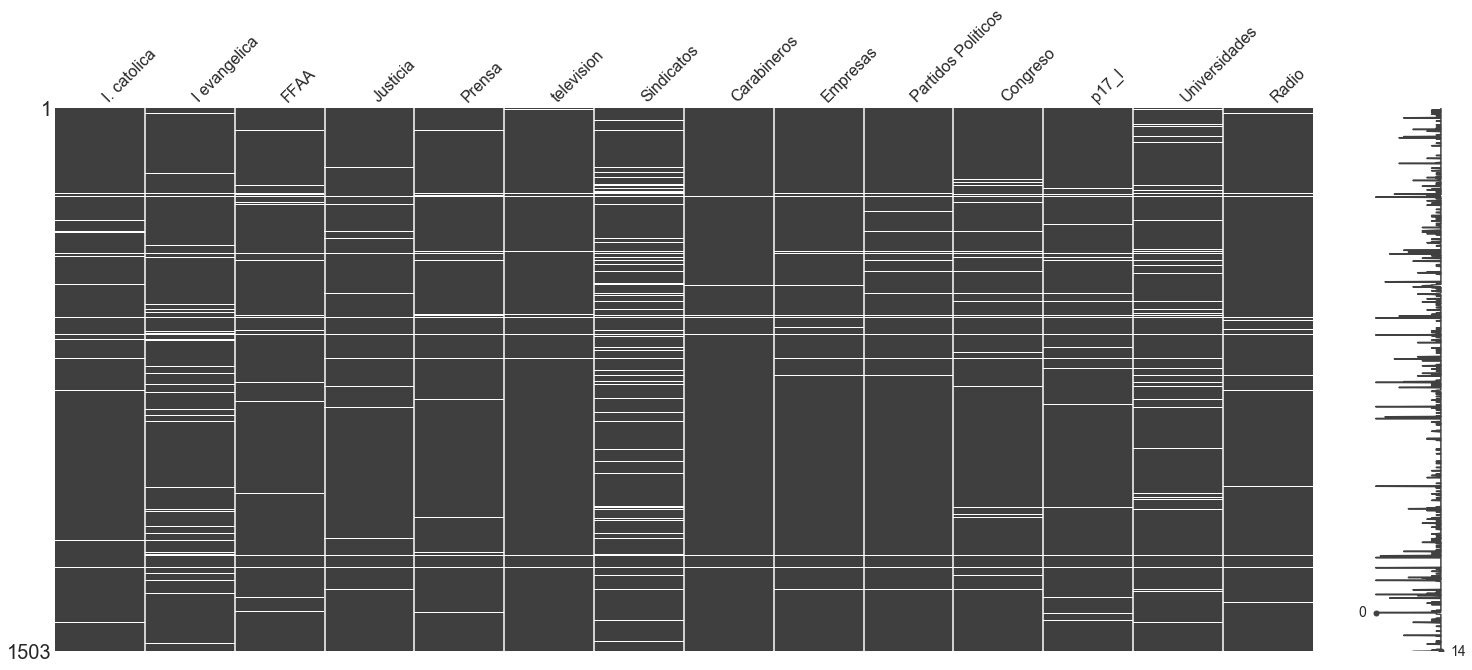

In [22]:
msgn.matrix(trust_df.replace([8,9],[np.nan,np.nan]))

In [23]:
variable, mean = [] , []
for colname, serie in trust_df.iteritems():
    variable.append(colname)
    mean.append(serie.mean())

tmp_df = pd.DataFrame({'var':variable,'mean':mean}).sort_values(by=['mean'])


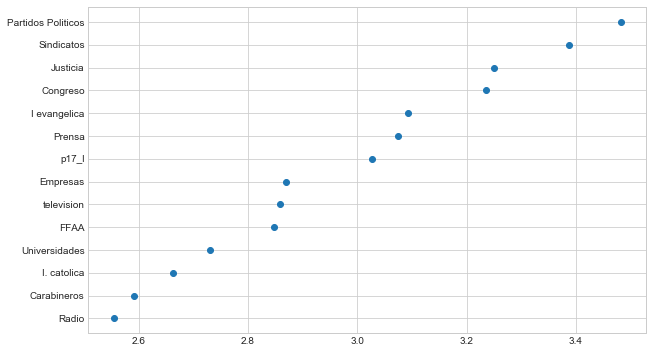

In [24]:
plt.plot(tmp_df['mean'], tmp_df['var'],'o')

In [25]:
import factor_analyzer as factor
factor.calculate_bartlett_sphericity(trust_df)

(6630.891612219014, 0.0)

In [26]:
factor.calculate_kmo(trust_df)

(                         KMO
 I. catolica         0.938611
 I evangelica        0.927266
 FFAA                0.931852
 Justicia            0.952914
 Prensa              0.919814
 television          0.885661
 Sindicatos          0.936799
 Carabineros         0.911312
 Empresas            0.939891
 Partidos Politicos  0.913019
 Congreso            0.919379
 p17_l               0.942421
 Universidades       0.951845
 Radio               0.932296, 0.9275552166414559)